In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)
import seaborn as sns

In [2]:
import torch

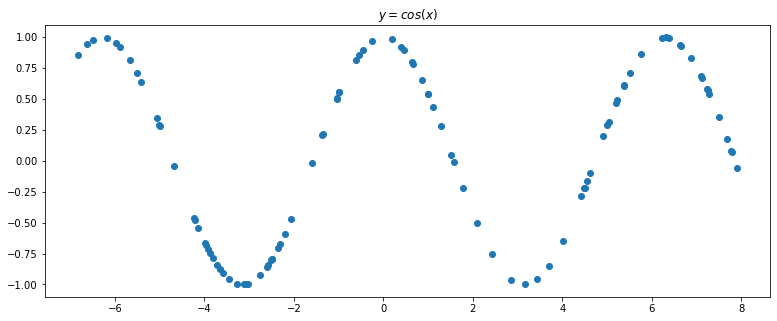

In [3]:
X_train = torch.rand(100)
X_train = 15.0*X_train-7.0

y_train = torch.cos(X_train)

plt.plot(X_train.numpy(),y_train.numpy(), 'o')
plt.title('$y = cos(x)$');

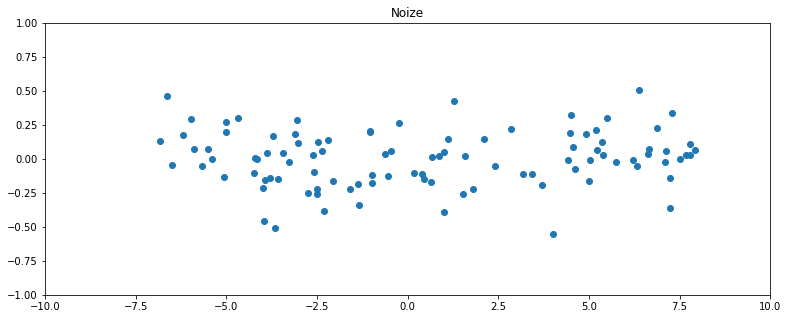

In [4]:
noize = torch.randn(y_train.shape)/5

plt.plot(X_train.numpy(),noize.numpy(), 'o')
plt.axis([-10,10,-1,1])
plt.title('Noize');

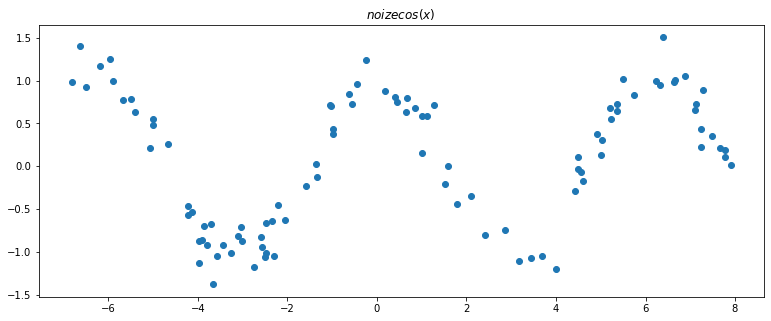

In [5]:
y_train = y_train+noize

plt.plot(X_train.numpy(),y_train.numpy(), 'o')
plt.title('$noize cos(x)$');


In [6]:
X_train.unsqueeze_(1)
y_train.unsqueeze_(1)

tensor([[ 0.7257],
        [-1.0590],
        [-0.4524],
        [-0.2928],
        [ 0.1508],
        [ 0.2133],
        [ 0.0056],
        [ 1.4035],
        [-0.2056],
        [ 0.5906],
        [-1.0190],
        [ 0.2190],
        [-0.6654],
        [-1.1097],
        [-0.0727],
        [-0.7401],
        [-0.8797],
        [ 1.0581],
        [ 0.6838],
        [-0.8282],
        [ 0.4329],
        [-0.9155],
        [-0.7087],
        [-0.9429],
        [ 0.2621],
        [-1.1316],
        [ 0.9963],
        [ 0.6589],
        [-0.1758],
        [ 1.2357],
        [-1.0679],
        [ 0.8855],
        [ 0.9437],
        [-0.6304],
        [ 0.1041],
        [ 0.7110],
        [-0.0306],
        [ 0.4841],
        [ 0.6741],
        [ 0.4320],
        [-0.6745],
        [ 0.7793],
        [ 0.6312],
        [ 0.8787],
        [ 0.3097],
        [ 1.1680],
        [ 0.5566],
        [ 0.2101],
        [ 0.3540],
        [ 0.7147],
        [-0.4400],
        [ 1.2486],
        [-0.

Text(0, 0.5, 'y_valid')

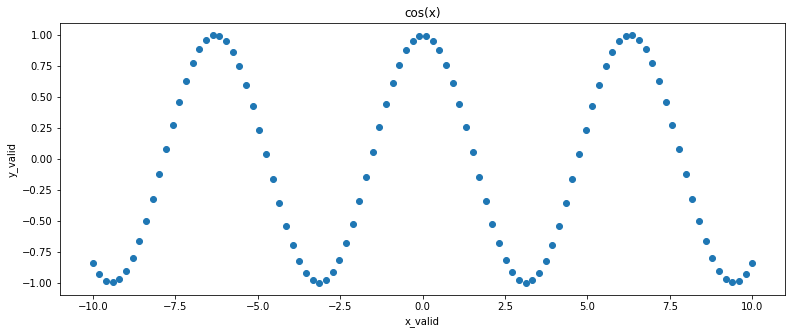

In [7]:
X_validation = torch.linspace(-10,10,100)
y_validation = torch.cos(X_validation)

plt.plot(X_validation.numpy(),y_validation.numpy(), 'o')
plt.title('cos(x)')
plt.xlabel('x_valid')
plt.ylabel('y_valid')

In [8]:
X_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[-0.8391],
        [-0.9312],
        [-0.9854],
        [-0.9995],
        [-0.9730],
        [-0.9069],
        [-0.8039],
        [-0.6683],
        [-0.5054],
        [-0.3220],
        [-0.1255],
        [ 0.0761],
        [ 0.2746],
        [ 0.4620],
        [ 0.6306],
        [ 0.7735],
        [ 0.8849],
        [ 0.9604],
        [ 0.9968],
        [ 0.9926],
        [ 0.9481],
        [ 0.8650],
        [ 0.7468],
        [ 0.5981],
        [ 0.4251],
        [ 0.2349],
        [ 0.0351],
        [-0.1662],
        [-0.3606],
        [-0.5405],
        [-0.6983],
        [-0.8277],
        [-0.9235],
        [-0.9817],
        [-0.9999],
        [-0.9775],
        [-0.9154],
        [-0.8160],
        [-0.6834],
        [-0.5230],
        [-0.3414],
        [-0.1459],
        [ 0.0556],
        [ 0.2548],
        [ 0.4437],
        [ 0.6145],
        [ 0.7603],
        [ 0.8751],
        [ 0.9544],
        [ 0.9949],
        [ 0.9949],
        [ 0.9544],
        [ 0.

In [9]:
class CosNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(CosNet, self).__init__()
        # fc - fully connected
        self.fc1 = torch.nn.Linear(1,n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons,1)
    
    def forward(self,x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

net = CosNet(3)     

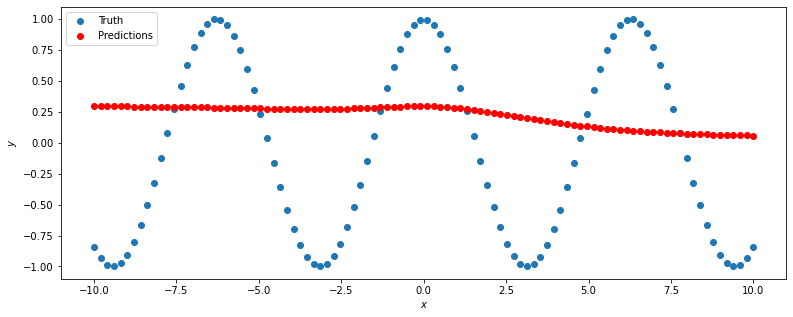

In [10]:
def predict(net,x,y):
    y_pred = net.forward(x)
    
    plt.plot(x.numpy(), y.numpy(), 'o', label='Truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Predictions')
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    
predict(net, X_validation,y_validation)

# Optimizer

In [11]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

# Loss function

In [12]:
def loss(pred, target):
    squares = (pred-target)**2
    return squares.mean()

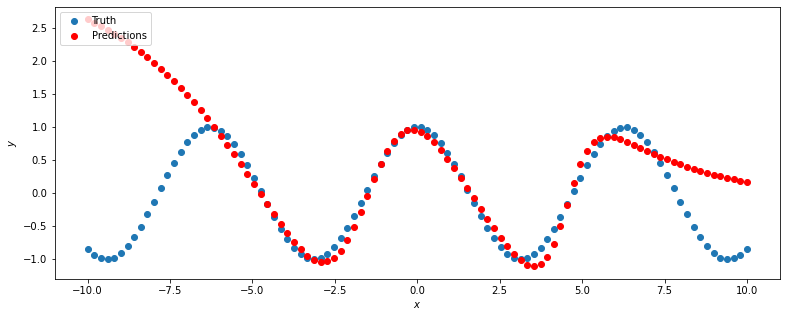

In [13]:
for epoch_index in range(3000):
    # zero all optimizers
    optimizer.zero_grad()
    
    y_pred = net.forward(X_train)
    loss_val = loss(y_pred, y_train)
    
    # find grad
    loss_val.backward()
    
    #next step of gradient
    optimizer.step()
    
predict(net, X_validation, y_validation)

In [14]:
X_train[X_train > 5].shape

torch.Size([24])

<AxesSubplot:ylabel='Count'>

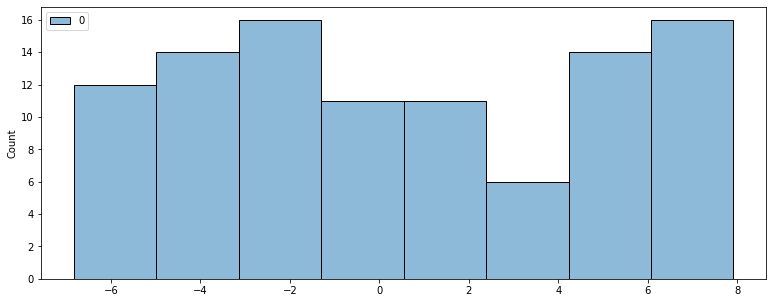

In [15]:
sns.histplot(X_train.numpy())